In [2]:
import os, shutil

In [3]:
original_dataset_dir = 'D:/original dataset'

In [4]:
base_dir = 'D:/working directory'
os.mkdir(base_dir)

In [5]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [6]:
train_shan_dir = os.path.join(train_dir, 'shan')
os.mkdir(train_shan_dir)

train_fawad_dir = os.path.join(train_dir, 'fawad')
os.mkdir(train_fawad_dir)

validation_shan_dir = os.path.join(validation_dir, 'shan')
os.mkdir(validation_shan_dir)

validation_fawad_dir = os.path.join(validation_dir, 'fawad')
os.mkdir(validation_fawad_dir)

test_shan_dir = os.path.join(test_dir, 'shan')
os.mkdir(test_shan_dir)

test_fawad_dir = os.path.join(test_dir, 'fawad')
os.mkdir(test_fawad_dir)

In [7]:
fnames = ['shan.{}.jpg'. format(i) for i in range(30)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_shan_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
fnames = ['shan.{}.jpg'.format(i) for i in range(30,40)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_shan_dir, fname)
    shutil.copyfile(src,dst)

In [19]:
fnames = ['shan.{}.jpg'.format(i) for i in range(40,50)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_shan_dir, fname)
    shutil.copyfile(src,dst)

In [12]:
fnames = ['fawad.{}.jpg'.format(i) for i in range(30)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_fawad_dir, fname)
    shutil.copyfile(src,dst)

In [16]:
fnames = ['fawad.{}.jpg'.format(i) for i in range(30,40)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_fawad_dir, fname)
    shutil.copyfile(src,dst)

In [18]:
fnames = ['fawad.{}.jpg'.format(i) for i in range(40,50)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_fawad_dir, fname)
    shutil.copyfile(src,dst)

In [20]:
print('Total training shan images:', len(os.listdir(train_shan_dir)))
print('Total training fawad images:', len(os.listdir(train_fawad_dir)))
print('Total validation shan images:', len(os.listdir(validation_shan_dir)))
print('Total validation fawad images:', len(os.listdir(validation_fawad_dir)))
print('Total test shan images:', len(os.listdir(test_shan_dir)))
print('Total test fawad images:', len(os.listdir(test_fawad_dir)))

Total training shan images: 30
Total training fawad images: 30
Total validation shan images: 10
Total validation fawad images: 10
Total test shan images: 10
Total test fawad images: 10


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation= 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [26]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./ 255)
test_datagen = ImageDataGenerator(rescale=1./ 255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [44]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:' , data_batch.shape)
    print('label batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


In [46]:
history = model.fit_generator(train_generator, steps_per_epoch=20, epochs = 10, 
                              validation_data = validation_generator,
                             validation_steps=10)

Epoch 1/10
20/20 [==============================] - 118s 6s/step - loss: 0.0034 - acc: 1.0000 - val_loss: 2.6961 - val_acc: 0.6500
Epoch 2/10
20/20 [==============================] - 133s 7s/step - loss: 0.0024 - acc: 1.0000 - val_loss: 2.7568 - val_acc: 0.6500
Epoch 3/10
20/20 [==============================] - 120s 6s/step - loss: 0.0339 - acc: 0.9875 - val_loss: 1.7402 - val_acc: 0.6500
Epoch 4/10
20/20 [==============================] - 111s 6s/step - loss: 0.0050 - acc: 1.0000 - val_loss: 2.4353 - val_acc: 0.6500
Epoch 5/10
20/20 [==============================] - 112s 6s/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.8184 - val_acc: 0.6500
Epoch 6/10
20/20 [==============================] - 107s 5s/step - loss: 8.0451e-04 - acc: 1.0000 - val_loss: 2.6722 - val_acc: 0.6500
Epoch 7/10
20/20 [==============================] - 111s 6s/step - loss: 0.0556 - acc: 0.9825 - val_loss: 2.5822 - val_acc: 0.6500
Epoch 8/10
20/20 [==============================] - 111s 6s/step - loss: 7.3180

In [47]:
model.save("working_directory_1.h5")

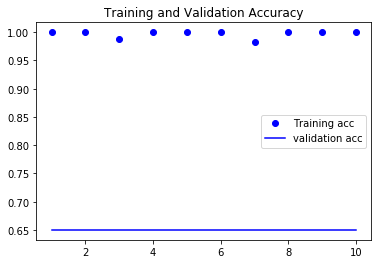

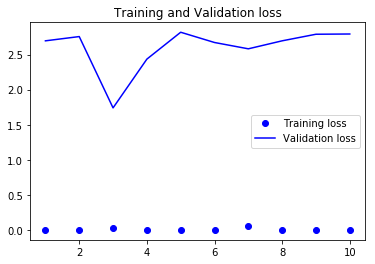

In [48]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label= 'validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss' )
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [49]:
datagen=ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

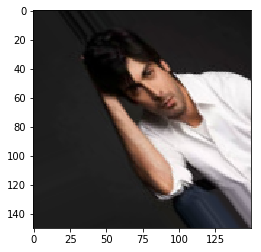

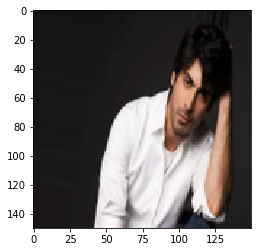

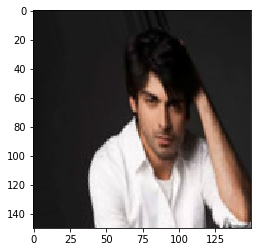

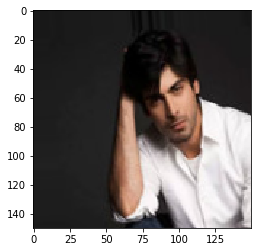

In [50]:
from tensorflow.keras.preprocessing import image

fnames=[os.path.join(train_fawad_dir,fname) for fname in os.listdir(train_fawad_dir)]
img_path=fnames[5]
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [51]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [52]:
train_datagen=ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,
target_size=(150,150),
batch_size=32,
class_mode='binary')
validation_generator=test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=32,
class_mode='binary')
history=model.fit_generator(
train_generator,
steps_per_epoch=20,
epochs=10,
validation_data=validation_generator,
validation_steps=10)

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
20/20 [==============================] - 173s 9s/step - loss: 0.7024 - acc: 0.5183 - val_loss: 0.6798 - val_acc: 0.5500
Epoch 2/10
20/20 [==============================] - 172s 9s/step - loss: 0.6908 - acc: 0.5400 - val_loss: 0.6681 - val_acc: 0.6000
Epoch 3/10
20/20 [==============================] - 175s 9s/step - loss: 0.6803 - acc: 0.5783 - val_loss: 0.6468 - val_acc: 0.7000
Epoch 4/10
20/20 [==============================] - 170s 8s/step - loss: 0.6749 - acc: 0.5883 - val_loss: 0.6387 - val_acc: 0.7500
Epoch 5/10
20/20 [==============================] - 172s 9s/step - loss: 0.6549 - acc: 0.6283 - val_loss: 0.6290 - val_acc: 0.6500
Epoch 6/10
20/20 [==============================] - 177s 9s/step - loss: 0.6373 - acc: 0.6400 - val_loss: 0.6307 - val_acc: 0.6500
Epoch 7/10
20/20 [==============================] - 168s 8s/step - loss: 0.5974 - acc: 0.6933 - val_loss: 0.6579 - val_acc: 0.6500
Epo

In [ ]:
# acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label= 'validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss' )
plt.title('Training and Validation loss')
plt.legend()

plt.show()